## import pre-requisites
* tensorflow/keras
    * make sure we have tf >= 2.0
* numpy / matplotlib



In [20]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.1.0


## prepare training / testing data
* load and normalize fashion_mnist
* check dataset size
* show us the images

(60000, 28, 28) (60000,)


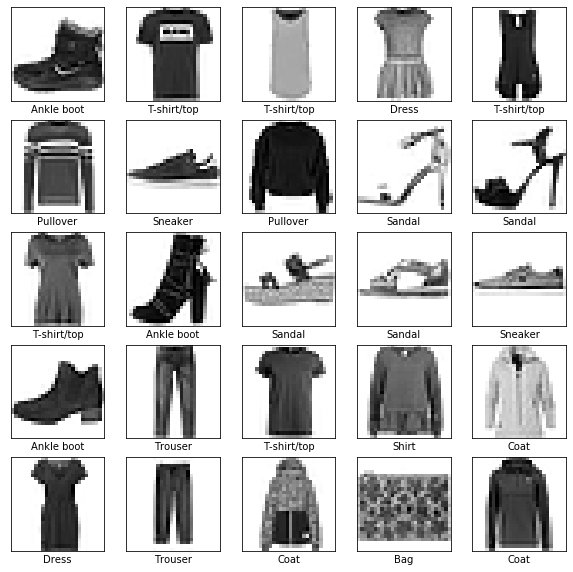

In [21]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']  
print(train_images.shape, train_labels.shape)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## now build the model
* two dense layers
* compile it with adam optimizer for classification

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.4967 - accuracy: 0.8251
Epoch 2/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3751 - accuracy: 0.8647
Epoch 3/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3352 - accuracy: 0.8769
Epoch 4/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3117 - accuracy: 0.8850
Epoch 5/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2941 - accuracy: 0.8929
Epoch 6/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2813 - accuracy: 0.8961
Epoch 7/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2673 - accuracy: 0.9015
Epoch 8/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2564 - accuracy: 0.9052
Epoch 9/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2447 - accuracy: 0.9093
Epoch 10/10
60

## how does the test data do?

In [25]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_loss, test_acc)

10000/10000 - 1s - loss: 0.3420 - accuracy: 0.8805

Test accuracy: 0.3420143667042255 0.8805


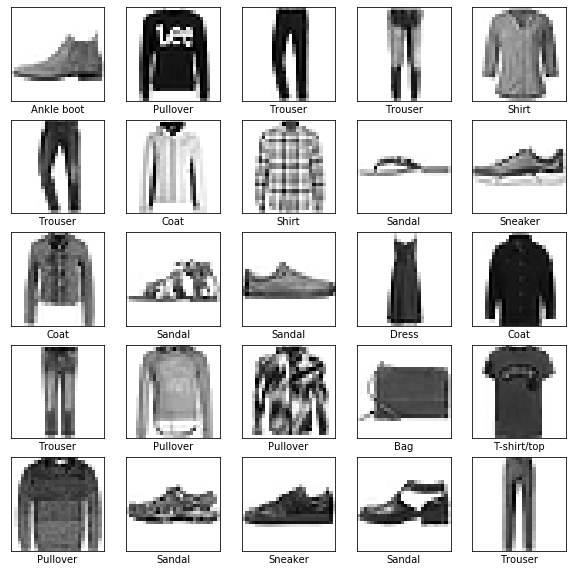

In [35]:
probability_model = \
    tf.keras.Sequential([model, 
                         tf.keras.layers.Softmax()])
test_predictions = probability_model.predict(test_images)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(test_predictions[i])])
plt.show()

In [61]:
model = keras.Sequential([
    keras.layers.Reshape((28,28,1), input_shape=(28,28)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2,2), padding='same'),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2,2), padding='same'),   
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2,2), padding='same'),       
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_7 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 7, 7, 16)          4624      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 16)        

In [62]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 118us/sample - loss: 1.7645 - accuracy: 0.6994
Epoch 2/10
60000/60000 [==============================] - 7s 119us/sample - loss: 1.6509 - accuracy: 0.8107
Epoch 3/10
60000/60000 [==============================] - 7s 112us/sample - loss: 1.6382 - accuracy: 0.8231
Epoch 4/10
60000/60000 [==============================] - 7s 111us/sample - loss: 1.6296 - accuracy: 0.8313
Epoch 5/10
60000/60000 [==============================] - 7s 115us/sample - loss: 1.5948 - accuracy: 0.8668
Epoch 6/10
60000/60000 [==============================] - 7s 117us/sample - loss: 1.5826 - accuracy: 0.8787
Epoch 7/10
60000/60000 [==============================] - 7s 110us/sample - loss: 1.5766 - accuracy: 0.8845
Epoch 8/10
60000/60000 [==============================] - 7s 111us/sample - loss: 1.5703 - accuracy: 0.8904
Epoch 9/10
60000/60000 [==============================] - 7s 117us/sample - loss: 1.5672 - accuracy: 0.8941
Epoch

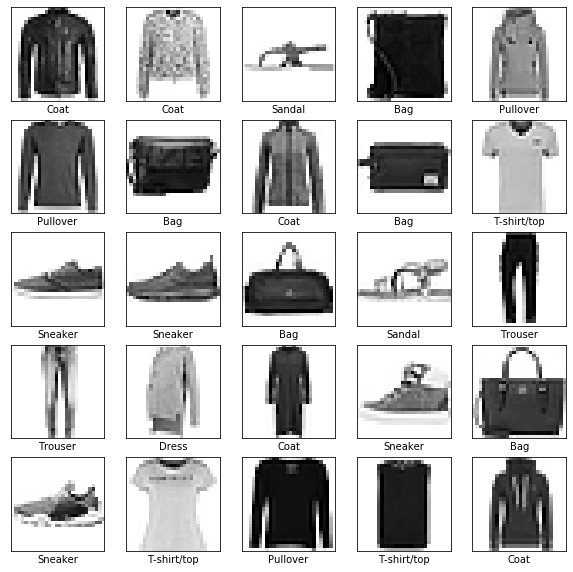

In [67]:
probability_model = \
    tf.keras.Sequential([model, 
                         tf.keras.layers.Softmax()])
test_predictions = probability_model.predict(test_images)
plt.figure(figsize=(10,10))
for i in range(50,75):
    plt.subplot(5,5,i-50+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(test_predictions[i])])
plt.show()